In [1]:
import sys
sys.path.append("..")

from tree_parser import file_contents, meta_math_database

from my_utils import print_proof_props_graph, get_proof_steps, print_ident_proof, print_proof_linear_steps
from my_utils import get_proof_steps_graph, print_proof_steps_graph


from expanding import construct_proof, expand_proof_step_ps, tree2str#, replace_expanded_step

from collections import defaultdict, Counter

In [2]:
%%time

text = file_contents("../set.mm")
database = meta_math_database(text,n=5000)

included 5555695 tokens from ../set.mm
proposition: 5000CPU times: user 18.2 s, sys: 520 ms, total: 18.8 s
Wall time: 19.1 s


dfss2


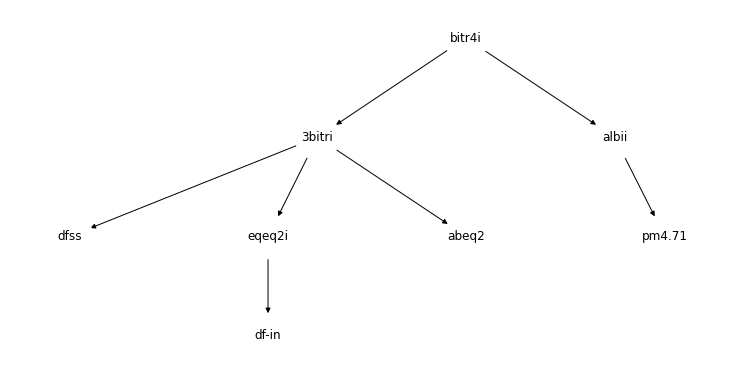

 <PStep:bitr4i ⊢ ( A ⊆ B ↔ ∀ x ( x ∈ A → x ∈ B ) )>
 |  <PStep:3bitri ⊢ ( A ⊆ B ↔ ∀ x ( x ∈ A ↔ ( x ∈ A ∧ x ∈ B ) ) )>
 |  |  <PStep:dfss ⊢ ( A ⊆ B ↔ A = ( A ∩ B ) )>
 |  |  <PStep:eqeq2i ⊢ ( A = ( A ∩ B ) ↔ A = { x | ( x ∈ A ∧ x ∈ B ) } )>
 |  |  |  <PStep:df-in ⊢ ( A ∩ B ) = { x | ( x ∈ A ∧ x ∈ B ) }>
 |  |  <PStep:abeq2 ⊢ ( A = { x | ( x ∈ A ∧ x ∈ B ) } ↔ ∀ x ( x ∈ A ↔ ( x ∈ A ∧ x ∈ B ) ) )>
 |  <PStep:albii ⊢ ( ∀ x ( x ∈ A → x ∈ B ) ↔ ∀ x ( x ∈ A ↔ ( x ∈ A ∧ x ∈ B ) ) )>
 |  |  <PStep:pm4.71 ⊢ ( ( x ∈ A → x ∈ B ) ↔ ( x ∈ A ↔ ( x ∈ A ∧ x ∈ B ) ) )>


In [3]:
prop = database.propositions["dfss2"]
#prop = database.propositions_list[-1]
print(prop.label)
prop_proof = construct_proof(prop)
prop_proof.print_graph()
prop_proof.print_linear()

In [20]:
theorems_usage = defaultdict(Counter)

for p in database.propositions_list:
    for s in p.entails_proof_steps:
        for ps in s._prior_entails:
            theorems_usage[ps.prop.label][s.prop.label] += 1

In [21]:
theorems_usage_norm = {}

for p1 in theorems_usage.keys():
    count_sum = 0
    for p2 in theorems_usage[p1].keys():
         count_sum += theorems_usage[p1][p2]
        
    theorems_usage_norm[p1] = dict()
    for p2 in theorems_usage[p1].keys():
         theorems_usage_norm[p1][p2] = theorems_usage[p1][p2] / count_sum


dfss2


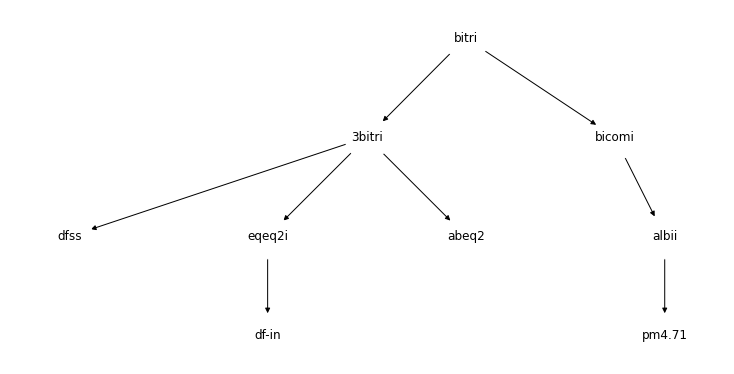

In [26]:
prop = database.propositions["dfss2"]
#prop = database.propositions_list[-1]
print(prop.label)
prop_proof = construct_proof(prop)
prop_proof = prop_proof.expand().get_root_step()

prop_proof.print_graph()

In [33]:
#prop_proof.get_steps_df()

In [43]:
for s in prop_proof.get_steps_df():
    try:
        if s.output != None:
            s_prob = theorems_usage_norm[s.label]
            s_prob = s_prob.get(s.output.label, 0)
            print(s.label,"->",s.output.label, s_prob)
        else:
            print(s, 0)
    except Exception as e:
        print(s.label, s_prob)
        raise e

<PStep:bitri ⊢ ( A ⊆ B ↔ ∀ x ( x ∈ A → x ∈ B ) )> 0
3bitri -> bitri 0
dfss -> 3bitri 0.3333333333333333
eqeq2i -> 3bitri 0.10526315789473684
df-in -> eqeq2i 0.2
abeq2 -> 3bitri 0.09090909090909091
bicomi -> bitri 0.09090909090909091
albii -> bicomi 0
pm4.71 -> albii 0.3


In [ ]:
pm4.71

In [46]:
theorems_usage["bicomi"]

Counter({'biimpi': 1,
         'bitri': 4,
         'syl5bb': 1,
         'syl5rbb': 1,
         'syl6bb': 1,
         'syl6rbb': 1,
         'mtbi': 1,
         'sylnib': 1,
         'sylnbi': 1,
         'xchnxbi': 1,
         'xchbinx': 1,
         'con1bii': 3,
         'con2bii': 1,
         'pm3.2i': 1,
         'syl8ib': 1,
         'syl3anb': 3,
         'imbi12i': 1,
         'mpbi': 2,
         'anbi12i': 2,
         'nfxfrd': 1,
         'necon3abii': 1,
         'necon1abii': 1,
         'necon1bbii': 1,
         'baib': 1,
         'eubii': 1,
         'mobii': 1,
         'anbi2i': 1,
         '3bitr3g': 1,
         'abbi2i': 2,
         'uneqri': 1,
         'ineqri': 1,
         'rbaibr': 1,
         'simplbi': 1,
         'ralbii': 1})

In [47]:
theorems_usage = defaultdict(Counter)

for p in database.propositions_list:
    for s in p.entails_proof_steps:
        if s.prop.label == 'bitri':
            for ps in s._prior_entails:
                if ps.prop.label == "bicomi":
                    print(p.label)

bitr3i
bitr4i
2reu5lem1
2reu5lem2


In [45]:
theorems_usage_norm["bicomi"]

{'biimpi': 0.022727272727272728,
 'bitri': 0.09090909090909091,
 'syl5bb': 0.022727272727272728,
 'syl5rbb': 0.022727272727272728,
 'syl6bb': 0.022727272727272728,
 'syl6rbb': 0.022727272727272728,
 'mtbi': 0.022727272727272728,
 'sylnib': 0.022727272727272728,
 'sylnbi': 0.022727272727272728,
 'xchnxbi': 0.022727272727272728,
 'xchbinx': 0.022727272727272728,
 'con1bii': 0.06818181818181818,
 'con2bii': 0.022727272727272728,
 'pm3.2i': 0.022727272727272728,
 'syl8ib': 0.022727272727272728,
 'syl3anb': 0.06818181818181818,
 'imbi12i': 0.022727272727272728,
 'mpbi': 0.045454545454545456,
 'anbi12i': 0.045454545454545456,
 'nfxfrd': 0.022727272727272728,
 'necon3abii': 0.022727272727272728,
 'necon1abii': 0.022727272727272728,
 'necon1bbii': 0.022727272727272728,
 'baib': 0.022727272727272728,
 'eubii': 0.022727272727272728,
 'mobii': 0.022727272727272728,
 'anbi2i': 0.022727272727272728,
 '3bitr3g': 0.022727272727272728,
 'abbi2i': 0.045454545454545456,
 'uneqri': 0.022727272727272728,


In [104]:
prop_proof.get_steps_df()[1]._step.prop.tree

<Tree: wb(wph(),wph())>

In [ ]:
precisa criar uma forma de gerar expressoes candidatas porque expressoes possiveis sao aninhadas

talvez precise pensar sobre correlacao com os outros inputs